In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy,mean_squared_error, categorical_crossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model,to_categorical
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import load_model
from tensorflow.python.framework.graph_util import convert_variables_to_constants
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import sys, os, gc

In [39]:
os.chdir("/home/fvalle/phd/datasets/gtex/log/10/")

In [40]:
K.set_learning_phase(0)
model=load_model("model.h5")

In [50]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in
                                  tf.compat.v1.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.compat.v1.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                          output_names, freeze_var_names)
    return frozen_graph

In [51]:
frozen_graph = freeze_session(tf.compat.v1.keras.backend.get_session(),output_names=[out.op.name for out in model.outputs])

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


AssertionError: dense/Identity is not in graph

In [53]:
tf.saved_model.save(model, "TF_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: TF_model/assets


INFO:tensorflow:Assets written to: TF_model/assets


In [52]:
tf.compat.v1.train.write_graph(frozen_graph, "TF_model/", "tf_model.pb", as_text=False)

NameError: name 'frozen_graph' is not defined

## optimize

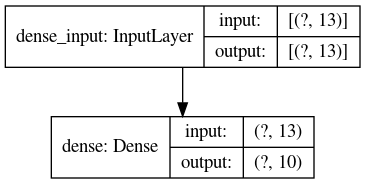

In [41]:
plot_model(model, show_shapes=True)

```python mo_tf.py --data_type FP16 --input_model /Users/filippo/Developer/TF_model/tf_model.pb --input_shape "[1,409]" --model_name sequential_1 --input dense_1_input --output dense_1/Softmax```

In [ ]:
pd.DataFrame(data=X_test).to_csv("input.txt", index=False, header=False, sep='\t')
pd.DataFrame(data=Y_test.argmax(axis=1)).astype(int).to_csv("test.txt", index=False, header=False, sep='\t')

In [ ]:
np.genfromtxt("test.txt", dtype=int)

In [ ]:
model.predict(X_test[:10]).argmax(axis=1)

In [ ]:
Y_test.argmax(axis=1)[:10]

In [ ]:
np.unique(df_labels['primary_site'])

In [ ]:
X_test